### 형태소 변환

In [1]:
import os
import pandas as pd

path = 'D:\elice_python\GAS_5\pytest'

os.chdir(path)
os.getcwd()

'D:\\elice_python\\GAS_5\\pytest'

In [2]:
def read_data(filename:str, encoding='cp949', start=1):
    with open(filename, 'r', encoding=encoding) as f :
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[start:]  # 파일 header 제외를 위해 설정.
    return data  # 각 요소는 파일의 한 줄에 해당하며, 각 줄은 탭으로 구분된 값들로 이루어진 리스트

In [3]:
def write_data(data,filename:str,encoding='cp949'):
    with open(filename,'w',encoding=encoding) as f :
        f.write(data)

In [4]:
data = read_data('ratings.txt', encoding='cp949')
print(type(data))
data[:10]

<class 'list'>


[['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1'],
 ['8132799',
  '"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."',
  '1'],
 ['4655635', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '1'],
 ['9251303', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '1'],
 ['10067386', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.', '1'],
 ['2190435', '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화', '1'],
 ['9279041', '완전 감동입니다 다시봐도 감동', '1'],
 ['7865729', '개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음', '1'],
 ['7477618', '굿', '1'],
 ['9250537', '바보가 아니라 병 쉰 인듯', '1']]

In [5]:
from tqdm import tqdm
import rhinoMorph
rn = rhinoMorph.startRhino()

morphed_data = ''
for data_each in tqdm(data):
    morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[1],
                                                  pos = ['NNG', 'NNP', 'VV', 'VA', 'XR', 
                                                         'IC', 'MM', 'MAG', 'MAJ'])
    joined_each = ' '.join(morphed_data_each)
    if joined_each:
        morphed_data += data_each[0] + '\t' + joined_each + '\t' + data_each[2] + '\n'
        
write_data(morphed_data, 'ratings_morphed.txt', encoding='cp949')

filepath:  C:\Users\Caelu\anaconda3\envs\tf_gpu\Lib\site-packages
classpath:  C:\Users\Caelu\anaconda3\envs\tf_gpu\Lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


100%|██████████| 200000/200000 [01:03<00:00, 3150.27it/s]


### 여기부터

In [7]:
import os
import pandas as pd

path = 'D:\elice_python\GAS_5\pytest'

os.chdir(path)
os.getcwd()

'D:\\elice_python\\GAS_5\\pytest'

In [8]:
def read_data(filename:str, encoding='cp949', start=1):
    with open(filename, 'r', encoding=encoding) as f :
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[start:]  # 파일 header 제외를 위해 설정.
    return data  # 각 요소는 파일의 한 줄에 해당하며, 각 줄은 탭으로 구분된 값들로 이루어진 리스트

In [9]:
def write_data(data,filename:str,encoding='cp949'):
    with open(filename,'w',encoding=encoding) as f :
        f.write(data)

In [10]:
data = read_data('ratings_morphed.txt', encoding='cp949')
print(len(data), len(data[0]))
print(data[0])

197550 3
['8132799', '디자인 배우 학생 외국 디자이너 일구 전통 통하 발전 문화 산업 부럽 사실 우리나라 그 어렵 시절 끝 열정 지키 노라노 같 전통 있 같 사람 꿈 꾸 이루 나가 있 감사', '1']


In [11]:
import random
import math
import numpy as np
random.shuffle(data)

part_num = math.floor(len(data)/3)
data = data[:part_num]
print(len(data))

65850


(근데 이럴거면 pandas로 열고 numpy로 sample 해도 되지 않나,,?)

In [12]:
data_text = [line[1] for line in data]
data_senti = [line[2] for line in data]

In [13]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_senti, test_senti = train_test_split(
    data_text, data_senti, stratify=data_senti, random_state=42)

In [14]:
from collections import Counter
train_senti_freq = Counter(train_senti)
print(train_senti_freq)

test_senti_freq = Counter(test_senti)
print(test_senti_freq)

Counter({'0': 24785, '1': 24602})
Counter({'0': 8262, '1': 8201})


In [15]:
import numpy as np

text_len = [len(line.split(' ')) for line in train_text]
print("최소길이: ", np.min(text_len)) 
print("최대길이: ", np.max(text_len)) 
print("평균길이: ", np.round(np.mean(text_len), 1)) 
print("중위수길이: ", np.median(text_len)) 
print("구간별 최대 길이: ", np.percentile(text_len, [0, 25, 50, 75, 90, 100]))

최소길이:  1
최대길이:  65
평균길이:  8.8
중위수길이:  7.0
구간별 최대 길이:  [ 1.  4.  7. 11. 19. 65.]


- (percentile) 사용할 단어 개수는 90%를 담을 수 있는 20개로 한다

In [16]:
print("최소길이 문장: ", train_text[np.argmin(text_len)])
print("최대길이 문장: ", train_text[np.argmax(text_len)])

최소길이 문장:  ㅋ
최대길이 문장:  아 평점 없 ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ 박태현


### Data Tokenizing
- 단어에 숫자 기호를 배당.

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

max_words = 10000 # 데이터셋에서 가장 빈도가 높은 10,000개 단어만 사용
maxlen=20 # 문장의 최대 토큰 길이를 20으로 설정.(나머지 버림)

tokenizer = Tokenizer(num_words = max_words) # 상위 빈도 10,000개
tokenizer.fit_on_texts(train_text)  # 여기서 빈도수 계산 및 인덱스 배정이 이뤄진다.
word_index = tokenizer.word_index #단어의 인덱스를 가져온다.

In [18]:
print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))

전체에서 21948개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>


- word_index의 길이는 더 높게 출력될 수 있지만, 실제로 모델에 전달될 때는 상위 10,000개의 단어만 사용된다.
    - max_words는 인덱싱할 단어의 수를 제한하는 역할을 하며, fit_on_texts는 모든 단어의 빈도를 계산한다. 
    - 따라서 고유한 토큰 수는 max_words 설정과 관계없이 전체 단어에서의 빈도에 따라 결정된다.

In [19]:
print('word_index: ', word_index)

word_index:  {'영화': 1, '하': 2, '보': 3, '없': 4, 'ㅋㅋ': 5, '재미있': 6, '너무': 7, '좋': 8, '되': 9, '있': 10, '정말': 11, '같': 12, '진짜': 13, '만들': 14, '나오': 15, '말': 16, '연기': 17, '최고': 18, '평점': 19, '안': 20, 'ㅋ': 21, '다': 22, '이': 23, '왜': 24, '주': 25, '잘': 26, '스토리': 27, '이런': 28, '드라마': 29, '알': 30, '더': 31, '때': 32, '배우': 33, '생각': 34, '사람': 35, '내용': 36, '가': 37, '좀': 38, '감독': 39, '아깝': 40, '그냥': 41, '재미': 42, '시간': 43, '지루': 44, '감동': 45, '재미없': 46, 'ㅠㅠ': 47, '쓰레기': 48, '다시': 49, '모르': 50, '작품': 51, '처음': 52, '들': 53, '아': 54, '마지막': 55, '못하': 56, '액션': 57, '사랑': 58, '완전': 59, '그': 60, '많': 61, '기대': 62, '정도': 63, '이야기': 64, '참': 65, '못': 66, '남': 67, '별로': 68, '오': 69, '이렇게': 70, '최악': 71, '느끼': 72, '지금': 73, '느낌': 74, '10점': 75, '무슨': 76, '장면': 77, '돈': 78, 'ㅎㅎ': 79, '명작': 80, '역시': 81, '쓰': 82, '끝': 83, '그리고': 84, '마음': 85, '많이': 86, '보이': 87, '주인공': 88, '괜찮': 89, '여자': 90, 'ㅠ': 91, '이것': 92, '한국': 93, '또': 94, '살': 95, '연출': 96, '좋아하': 97, '안되': 98, '그렇': 99, '받': 100, 'ㅡㅡ': 101, '이해': 

### Data Sequencing
- 텍스트를 숫자로 변환한다.
- 상위 빈도 {max_words}개의 단어만 추출하여 word_index의 숫자 리스트로 변환한다.

In [20]:
data = tokenizer.texts_to_sequences(train_text) # 데이터에 토크나이저 적용
print(f'data 0 : {data[:5]}')
print(f'texts 0 : {train_text[:5]}')

data 0 : [[92, 1176, 296, 2434, 1176, 9980], [355, 277, 301, 40, 14, 8131, 192, 566, 3419, 3210], [34, 548, 72], [3624, 160, 20, 3, 8, 820, 9981, 2, 697, 2260, 9, 85, 1072, 42, 449, 3, 9, 85, 38, 1072, 205, 9, 4890, 1072, 1263], [132, 10, 11, 18, 51, 6026, 6027, 173, 18]]
texts 0 : ['이것 현 우리나라 만화영화 현 주소', '초반 설정 너무나 아깝 만들 미로 길 잃 미야자키 고로', '생각 존재 느끼', '취 줄 안 보 좋 이미 사회생활 하 년 가까이 되 마음 무겁 재미 집중 보 되 마음 좀 무겁 공감 되 미생 무겁 버전', '유치 있 정말 최고 작품 리턴 파이널 모두 최고']


### Data Padding
- padding은 데이터의 길이를 고정해준다.
- 지정된 길이에 모자라는 것은 앞에서 부터 0으로 채운다. (padding='pre')
- 넘치는 것은 앞에서부터 잘라낸다. (truncating='pre')

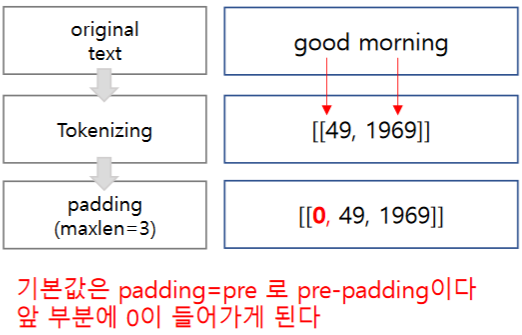

- LSTM, GRU와 같은 recurrent model은 입력 데이터의 순차적인 특성을 모델링 한다.

- pre-padding일 경우에는 앞단에 0이 채워져 마지막 단어로 패딩이 입력으로 들어가는 일이 없다.

- 반면, post-padding일 경우에는 뒷단에 0이 채워져 마지막 단어로 0이 들어갈 수 있다.

- 이는 순차적으로 데이터가 입력되는 recurrent model 들의 long-dependency를 심화시킬 수 있다.

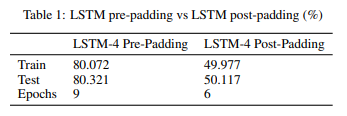
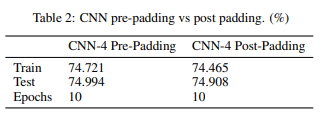
- D. M. Reddy et al, "Effects of Padding on LSTMs and CNNs", arXiv:1903.07288v1 [cs.LG], 2019.

In [21]:
data = pad_sequences(data, maxlen=maxlen, padding='pre')

print('data:', data)
print('data 0:', data[0])
print('data 0의 길이:', len(data[0]))

data: [[   0    0    0 ... 2434 1176 9980]
 [   0    0    0 ...  566 3419 3210]
 [   0    0    0 ...   34  548   72]
 ...
 [ 182  116   62 ... 6559 1799 8085]
 [   0    0    0 ...   16  148    4]
 [   0    0    0 ...    9  847   61]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
   92 1176  296 2434 1176 9980]
data 0의 길이: 20


In [22]:
print(type(train_text))
print(type(data))
print(data.shape)

<class 'list'>
<class 'numpy.ndarray'>
(49387, 20)


### One/Multi-Hot Encoding
- 모든 요소를 0, 1로 구성한다.
- 한 배열에 여러 개의 1이 있는 이러한 방식을 multi-hot 방식이라고 한다.

In [23]:
sample = [[4,5,6], [7,8,9]]
arr = np.zeros((len(sample),10)) # 헹 : sample의 데이터 수, 열 : 0~9

for i, seq in enumerate(sample) :
    arr[i,seq] = 1
    
arr

array([[0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [24]:
def to_hot(sequences, dimension):
    results = np.zeros((len(sequences),dimension))
    for i, seq in enumerate(sequences):
        results[i,seq] = 1
    return results

In [25]:
data_hot = to_hot(data, dimension=max_words)
labels = np.asarray(train_senti).astype('float32')

- max_words보다 단어가 적으면 거기에 맞추면 될듯

In [26]:
print(data_hot)
print(len(data_hot[0]))
print(data_hot[0][:100])

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
10000
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0.]


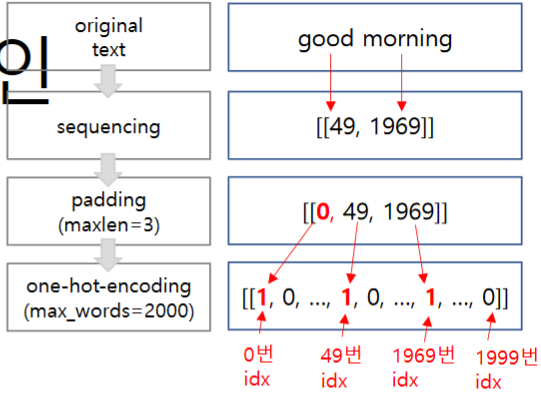

### 입력부 노드
- 이상의 결과로 신경망의 입력부 노드는 위와 같이 원-핫 인코딩 결과로 시작된다.
- 입력층의 노드는 총 10,000개이며, 위 예에서는 padding 0을 포함, 5개 노드만 1이 된다.
- 이들 각각은 은닉층의 노드에 각각의 가중치가 곱해져 전달된다
    - 나머지는 0이므로 값이 전달되지 않는다 

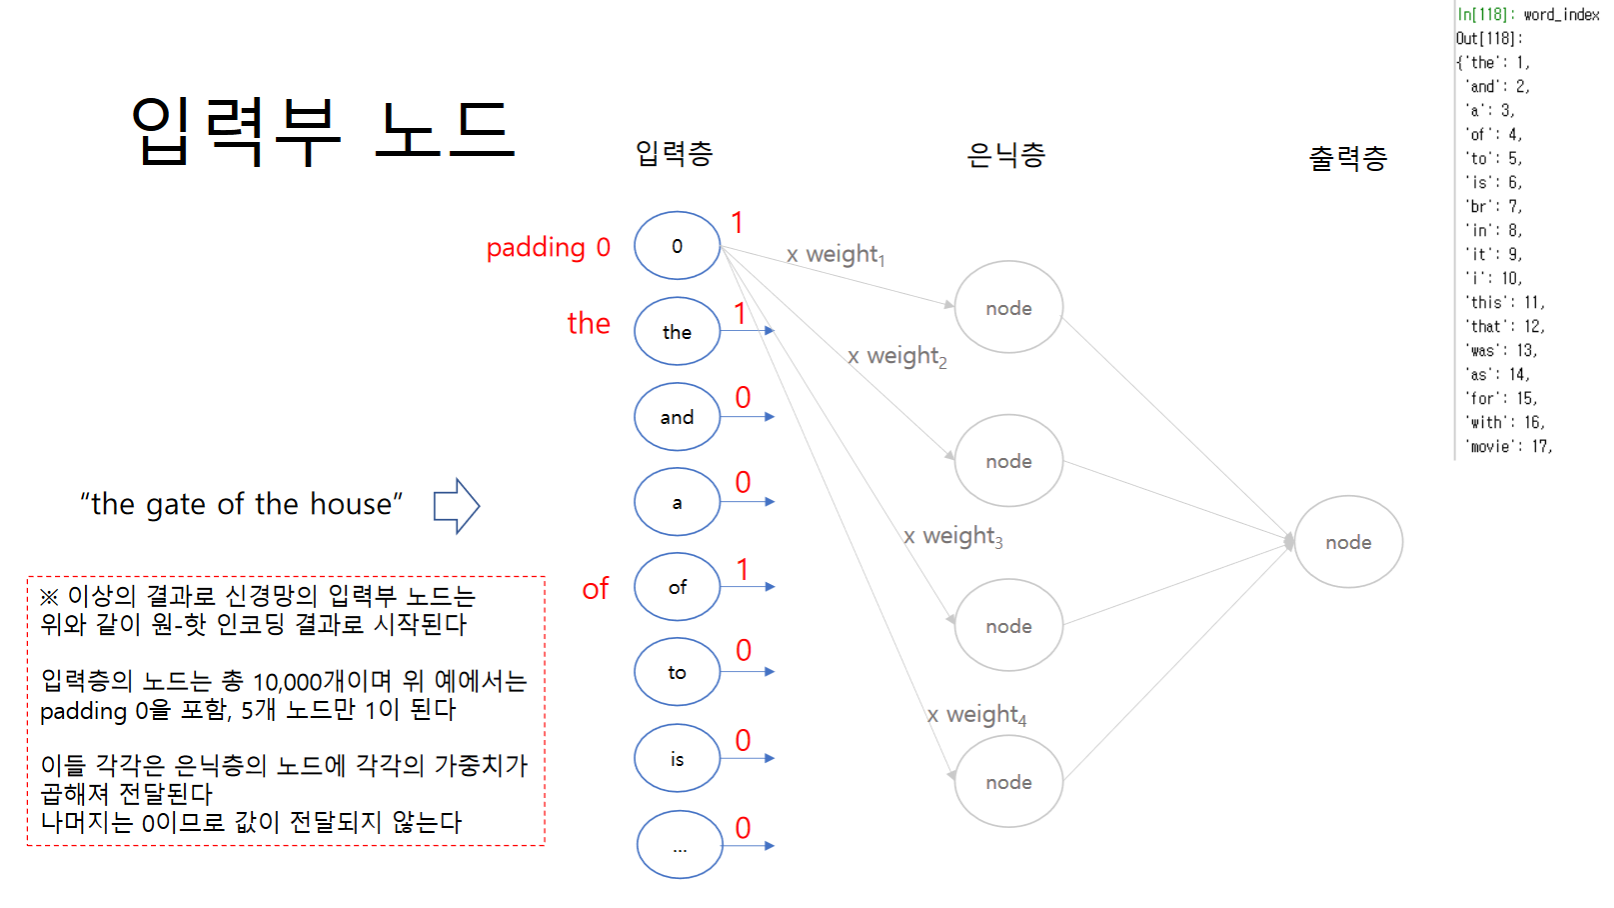

In [27]:
print(type(train_text))
print(type(data_hot))
print(data_hot.shape)

print('데이터 텐서의 차원:', data_hot.ndim)
print('레이블 텐서의 차원:', labels.ndim)
print('데이터 텐서의 크기:', data_hot.shape, '<-', data.shape)
print('레이블 텐서의 크기:', labels.shape)

<class 'list'>
<class 'numpy.ndarray'>
(49387, 10000)
데이터 텐서의 차원: 2
레이블 텐서의 차원: 1
데이터 텐서의 크기: (49387, 10000) <- (49387, 20)
레이블 텐서의 크기: (49387,)


### 훈련데이터에서 검증데이터 분리
- 하이퍼 파라미터 설정이 끝나면 Train과 Validation 데이터는 다시 결합해 모델을 최종 훈련시킬 수 있다.

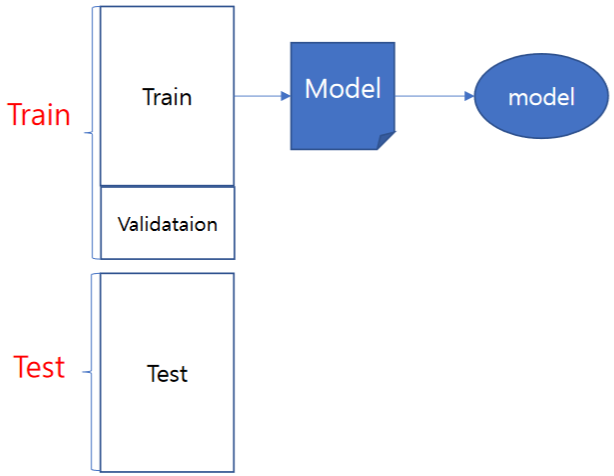

In [28]:
validation_ratio = 0.3 # 30%는 검증데이터로 사용한다. 나머지는 훈련데이터
validation_len = math.floor(len(train_text) * validation_ratio)
x_train = data_hot[validation_len:] # 훈련데이터의 70%는 훈련데이터
y_train = labels[validation_len:] # 훈련데이터의 70%는 훈련데이터 Label
x_val = data_hot[:validation_len] # 훈련데이터의 30%는 검증데이터
y_val = labels[:validation_len] # 훈련데이터의 30%는 검증데이터 Label

In [29]:
x_train.dtype,x_train.shape, y_train.dtype, y_train.shape, x_val.dtype, x_val.shape, y_val.dtype, y_val.shape

(dtype('float64'),
 (34571, 10000),
 dtype('float32'),
 (34571,),
 dtype('float64'),
 (14816, 10000),
 dtype('float32'),
 (14816,))

In [30]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')


- 혹은 train_test_split

### 모델 설계

In [25]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [26]:
# del model
# import gc
# gc.collect()


In [99]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()

model.add(Input(shape=(max_words,)))
model.add(Dense(128, activation='relu')) # 첫 번째 은닉층
# model.add(Dense(64, activation='relu')) # 두 번째 은닉층
model.add(Dense(32, activation='relu')) # 두 번째 은닉층
model.add(Dense(1, activation='sigmoid'))

- 이진분류 문제이고 신경망의 출력이 확률로 나와야 하므로, 0~1로 출력하는 sigmoid를 택하고, 노드는 1개로 하였다
    - 다중분류에서는 softmax를 사용한다

In [100]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               1280128   
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,284,289
Trainable params: 1,284,289
Non-trainable params: 0
_________________________________________________________________


### Compile & Train Model
- 이진 분류 이므로 binary_crossentropy를 사용한다.

In [101]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop', 
    metrics = ['acc']
)

- 배치와 epochs 설정.
    - 배치는 보통 8~512를 이용.
- 훈련 데이터로 훈련하고 검증데이터로 검증한다.
- history로 받은 반환값은 훈련 과정의 정보들을 담고 있는 딕셔너리다.

In [102]:
print(np.isnan(x_train).sum())  # NaN 값 확인
print(np.isnan(y_train).sum())

0
0


In [103]:
def data_generator(X, y, batch_size):
    sample_count = X.shape[0]
    while True:  # 무한 반복 생성기
        for offset in range(0, sample_count, batch_size):
            batch_X = X[offset:offset+batch_size]
            batch_y = y[offset:offset+batch_size]
            yield batch_X, batch_y

# 제너레이터를 모델에 적용
batch_size = 32
train_generator = data_generator(x_train, y_train, batch_size)

history = model.fit(
    # x_train[:30000], 
    # y_train[:30000],
    # batch_size = 128,
    train_generator,
    steps_per_epoch=len(x_train) // batch_size,
    epochs = 6,
    validation_data = (x_val,y_val)
)

Epoch 1/6
1080/1080 [==============================] - 6s 5ms/step - loss: 0.4294 - acc: 0.8012 - val_loss: 0.4037 - val_acc: 0.8168
Epoch 2/6
1080/1080 [==============================] - 5s 4ms/step - loss: 0.3663 - acc: 0.8431 - val_loss: 0.4031 - val_acc: 0.8179
Epoch 3/6
1080/1080 [==============================] - 5s 4ms/step - loss: 0.3462 - acc: 0.8559 - val_loss: 0.4039 - val_acc: 0.8193
Epoch 4/6
1080/1080 [==============================] - 4s 4ms/step - loss: 0.3285 - acc: 0.8672 - val_loss: 0.4065 - val_acc: 0.8213
Epoch 5/6
1080/1080 [==============================] - 4s 4ms/step - loss: 0.3093 - acc: 0.8776 - val_loss: 0.4077 - val_acc: 0.8201
Epoch 6/6
1080/1080 [==============================] - 5s 4ms/step - loss: 0.2897 - acc: 0.8868 - val_loss: 0.4169 - val_acc: 0.8151


- train data가 20000을 넘을 때 cpu->gpu로 로딩할 때 지속적으로 오류가 발생해 제너레이터 형식으로 설정했다.

```
--> 102 return ops.EagerTensor(value, ctx.device_name, dtype)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized."
```

In [104]:
history_dict = history.history

### Save Model

In [105]:
path

'D:\\elice_python\\GAS_5\\pytest'

In [113]:
model.save(os.path.join(path, 'models','text_binary_model.keras'))

In [116]:
import pickle
with open(os.path.join(path,'models','text_binary_tokenizer.pickle'), 'wb') as handle : 
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [117]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

print(f'Train acc. of each epoch : {np.round(acc,3)}')
print(f'Valid acc. of each epoch : {np.round(val_acc,3)}')

Train acc. of each epoch : [0.801 0.843 0.856 0.867 0.878 0.887]
Valid acc. of each epoch : [0.817 0.818 0.819 0.821 0.82  0.815]


### Plotting Acc.

range(1, 7)


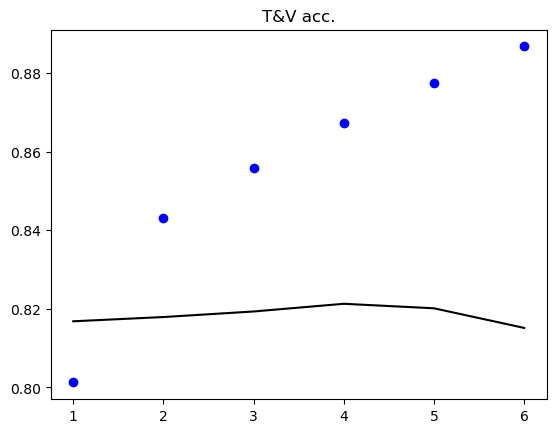

In [118]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc)+1)
print(epochs)

plt.plot(epochs, acc, 'bo', label = 'Training Acc.')
plt.plot(epochs, val_acc, 'black', label = 'Validation Acc.')
plt.title('T&V acc.')
plt.show()

### Plotting Loss

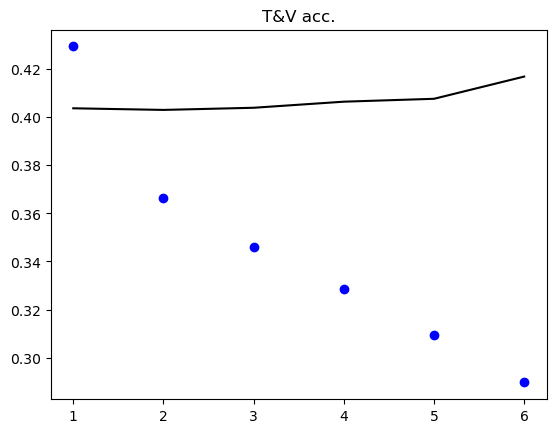

In [119]:
plt.figure()  # 새로운 figure
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'black', label = 'Validation loss')
plt.title('T&V acc.')
plt.show()

### Load Model

In [1]:
import os
from keras.models import load_model

path = 'D:\elice_python\GAS_5\pytest'
model_path = os.path.join(path, 'models')
os.chdir(model_path)

In [2]:
loaded_model = load_model('text_binary_model.keras')
print(loaded_model)

In [4]:
import pickle

with open('text_binary_tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

## 테스트 데이터 확인

In [5]:
len(loaded_tokenizer.word_index), loaded_model.input_shape[1]

(22062, 10000)

In [31]:
data = loaded_tokenizer.texts_to_sequences(test_text)
data = pad_sequences(data, maxlen=maxlen, padding='pre', truncating='pre')
x_test = to_hot(data, dimension=loaded_model.input_shape[1]).astype('float32')
y_test = np.asarray(test_senti).astype('float32')

In [32]:
test_eval = loaded_model.evaluate(x_test, y_test)
print(test_eval)

515/515 [==============================] - 2s 2ms/step - loss: 0.3861 - acc: 0.8322
[0.3860945701599121, 0.8322298526763916]


### 1개 데이터 예측

- 형태소분석을 포함하여 전 과정을 진행해주어야 한다

In [33]:
text = ["재미있게 잘 봤습니다"] # 데이터를 list 타입으로 만든다

import rhinoMorph
rn = rhinoMorph.startRhino()

maxlen = 20
max_words = 10000

    # 리스트 컴프리헨션으로 실질형태소만을 리스트로 가져온다
text=[rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=False) for sentence in text]
print('형태소 분석 결과: ', text)

data = loaded_tokenizer.texts_to_sequences(text) # Tokenizing
data = pad_sequences(data, maxlen=maxlen) # Padding
x_test = to_hot(data, dimension=max_words).astype('float32') # One-Hot Encoding
prediction = loaded_model.predict(x_test)
print('Result: ', prediction)

filepath:  C:\Users\Caelu\anaconda3\envs\tf_gpu\Lib\site-packages
classpath:  C:\Users\Caelu\anaconda3\envs\tf_gpu\Lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!
형태소 분석 결과:  [['재미있', '잘', '보']]
1/1 [==============================] - 0s 101ms/step
Result:  [[0.9317407]]


### 참고 : text_to_matrix

In [36]:
print(train_text[0])
data = tokenizer.texts_to_matrix(train_text, mode = 'binary').astype('float32')
labels = np.asarray(train_senti).astype('float32')

print(data)
print(len(data), len(data[0]))
print(data[0][:100])
print(data.dtype)

이것 현 우리나라 만화영화 현 주소
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
49387 10000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0.]
float32


- texts_to_sequence와 padding을 거치지 않는다.